In [1]:
#import mygene
import numpy as np
import pandas as pd
import os
import sys
sys.path.append("./")
import ai_gene_extract as ai
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gene_symbols = ["NTRK2","MAG"] #test values
CB_donor_file = "donors_all_slab_type_CB.csv"
nean_data_dir = "./neanderthal_introgressed/"
allen_data_dir = "./alleninf/alleninf/data/"
donor_data_dir = "./donor_data/"

CB_donor_file_goodWells = "donors_all_slab_type_CB_goodWells.hdf"
whole_brain_donor_file_goodWells = "donors_all_goodWells.hdf"
df_donor_data_CB = pd.read_hdf(os.path.join(donor_data_dir,CB_donor_file_goodWells))
df_donor_data_all_goodWells = pd.read_hdf(os.path.join(donor_data_dir,whole_brain_donor_file_goodWells))


In [3]:
# probes are the same for ALL donors, same file (checked with diff)
donor_id = "H0351.2001"
df_probes = pd.read_csv(os.path.join(donor_data_dir,donor_id,'Probes.csv'),header=0,index_col=0) #setting index_col lets us lookup by probe_id
MNI_corr = pd.read_csv(os.path.join(allen_data_dir,"corrected_mni_coordinates.csv"),header=0,index_col=0)


In [4]:
ai=reload(ai)
res = ai.ai_extract(gene_symbols,df_donor_data_CB,df_probes,MNI_corr)

  Averaging expression across 7 probes
  Averaging expression across 3 probes


/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
ai_gene_extract.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  gene_expression_coords[expression_col_name].values)


number of wells in data: 368
./allen_well_locations_expression_all_NTRK2.nii.gz
Mapping of wells to voxels saved to nii.gz file.


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/chris/.local/lib/python2.7/site-packages/nilearn/plotting/glass_brain.py:164: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  black_bg = colors.colorConverter.to_rgba(ax.get_axis_bgcolor()) \
/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


number of wells in data: 368
./allen_well_locations_expression_all_MAG.nii.gz
Mapping of wells to voxels saved to nii.gz file.


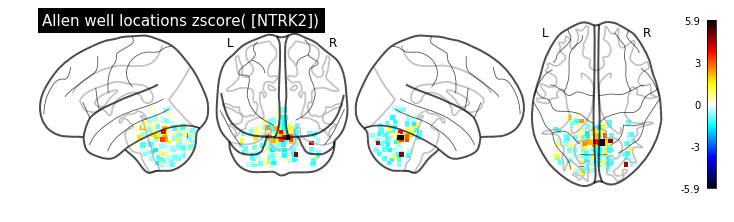

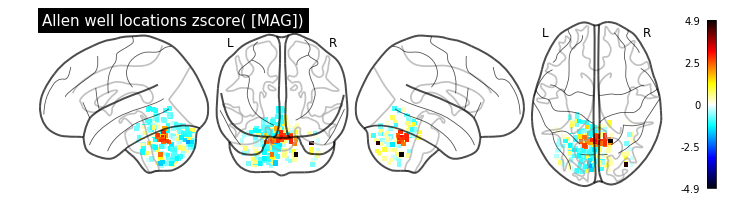

In [5]:
for gene_symbol in gene_symbols:
    ai.plot_gene_expression(res,gene_symbol=gene_symbol,zscore_plotting_data=True,add_vox_xyz=2)

In [19]:
# extract from some ROIs
ai = reload(ai)
segmentation_file = "./XXX_temp_mask_2labels_v1.nii.gz"
gene_symbol_list = ['61E3.4', 'A1BG', 'A1CF', 'A26C1B', 'A2BP1', 'A2LD1', 'A2M',
       'A2ML1', 'A3GALT2P', 'A4GALT']
gene_symbol_list = ["MAG","MAL","NTRK2"]
df_expression_coords = ai.ai_extract(gene_symbol_list,df_donor_data_all_goodWells,df_probes,MNI_corr)
df_res=ai.get_gene_expression_summary_in_mask(segmentation_file,df_expression_coords,verbose=False)


  Averaging expression across 3 probes
  Averaging expression across 4 probes
  Averaging expression across 7 probes
Creating the 3d expression data from donor H0351.1016
Creating the 3d expression data from donor H0351.2002
Creating the 3d expression data from donor H0351.1012
Creating the 3d expression data from donor H0351.1015
Creating the 3d expression data from donor H0351.2001
Creating the 3d expression data from donor H0351.1009


In [7]:
#gene_symbol_list_3 = ["MAG","MAL","NTRK2"]
#df_expression_coords = ai.ai_extract( ["MAG","MAL","NTRK2"],df_donor_data_all_goodWells,df_probes,MNI_corr)
#df_res=ai.get_gene_expression_summary_in_mask(segmentation_file,df_expression_coords,verbose=False)


In [20]:
regions = df_res.columns[2:] #not great, but hey...

plot_d = df_res.groupby(["gene_symbol"])[regions].mean()
variables = plot_d.index.values #gene names are variables, around the radar (list)
region_values = plot_d.values.T #list of values asociated with genes, now row = mask ID and col = gene #TODO: betterXXX
region_names = plot_d.columns

# XXX TODO: specify range by min and max of data --> etc: df_res['mask_id_2'].max()
my_range = [(0,15)]
ranges = my_range * len(region_values[0])
len(variables)

3

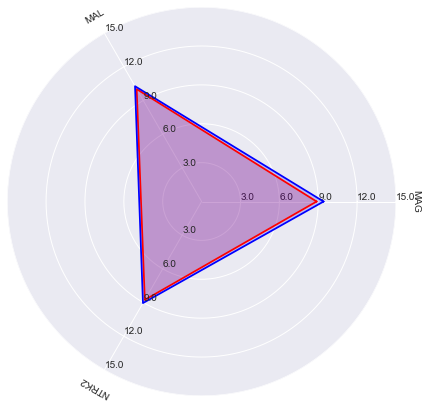

In [21]:
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables,ranges)
radar.plot(region_values[0], color="r")
radar.fill(region_values[0], alpha=0.2, color="r")

radar.plot(region_values[1], color="b")
radar.fill(region_values[1], alpha=0.2, color="b")


In [10]:
## define radar plots for looking at expression in different regions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics

#Source: https://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart

def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    # for d, (y1, y2) in zip(data[1:], ranges[1:]):
    for d, (y1, y2) in zip(data, ranges):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)

    x1, x2 = ranges[0]
    d = data[0]

    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1

    sdata = [d]

    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1

        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)

    return sdata

def set_rgrids(self, radii, labels=None, angle=None, fmt=None,
               **kwargs):
    """
    Set the radial locations and labels of the *r* grids.
    The labels will appear at radial distances *radii* at the
    given *angle* in degrees.
    *labels*, if not None, is a ``len(radii)`` list of strings of the
    labels to use at each radius.
    If *labels* is None, the built-in formatter will be used.
    Return value is a list of tuples (*line*, *label*), where
    *line* is :class:`~matplotlib.lines.Line2D` instances and the
    *label* is :class:`~matplotlib.text.Text` instances.
    kwargs are optional text properties for the labels:
    %(Text)s
    ACCEPTS: sequence of floats
    """
    # Make sure we take into account unitized data
    radii = self.convert_xunits(radii)
    radii = np.asarray(radii)
    rmin = radii.min()
    # if rmin <= 0:
    #     raise ValueError('radial grids must be strictly positive')

    self.set_yticks(radii)
    if labels is not None:
        self.set_yticklabels(labels)
    elif fmt is not None:
        self.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    if angle is None:
        angle = self.get_rlabel_position()
    self.set_rlabel_position(angle)
    for t in self.yaxis.get_ticklabels():
        t.update(kwargs)
    return self.yaxis.get_gridlines(), self.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            # ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            set_rgrids(ax, grid, labels=gridlabel, angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

variables = ['SANS_blunting','SANS_alogia', 'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_BizBeh', 'SAPS_posForTh']

ranges = [(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6),(-0.4,0.6)]

#
#print np.max(Group1), np.min(Group1)
#print np.max(Group2), np.min(Group2)
#fig1 = plt.figure(figsize=(6, 6))
#radar = ComplexRadar(fig1, variables,ranges)
#radar.plot(Group1, color="r")
#radar.fill(Group1, alpha=0.2, color="r")

#radar = ComplexRadar(fig1, variables,ranges)
#radar.plot(Group2,color="g")
#radar.fill(Group2, alpha=0.2,color="g")

#plt.show()